# Experiment A: Symmetry Removal Algorithm

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib agg


import global_settings
from utils import experiments, results, evaluation, equioutput
import visualization
import jax.numpy as jnp
import os

In [2]:
experiment = experiments.ExperimentSampleStandard(
    settings=experiments.settings.SettingsExperimentSample(
        output_path=global_settings.PATH_RESULTS,
        dataset=global_settings.DATASET_NAMES[0],
        dataset_normalization="standardization",
        hidden_layers=1,
        hidden_neurons=3,
        activation="tanh",
        activation_last_layer="none",
        num_warmup=2**10,
        statistic="reduced",
        statistic_p=0.99,
        samples_per_chain=1,
        identifiable_modes=3,
        pool_size=1, # has no effect in jupyter notebook, use script instead
        seed=0,
        overwrite_chains=None
    )
)

## Run experiment

In [3]:
experiment.run()

model transformation parameters 10
number of chains: 1274


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1274/1274 [17:06<00:00,  1.24it/s]


## Optional: Save Experiment

## Optional: Load experiment

## Remove Symmetries

In [4]:
sequential_helper = equioutput.SequentialHelper(
    transformation=experiment._model_transformation,
    dataset=experiment._dataset
)
structured_sequential_samples_parameters = sequential_helper.structured_sequential_samples_parameters(
    samples_parameters=experiment.result.samples["parameters"]
)
symmetry_helper = equioutput.SymmetryHelper(structured_sequential_samples_parameters)

### Before Removal

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.70it/s]


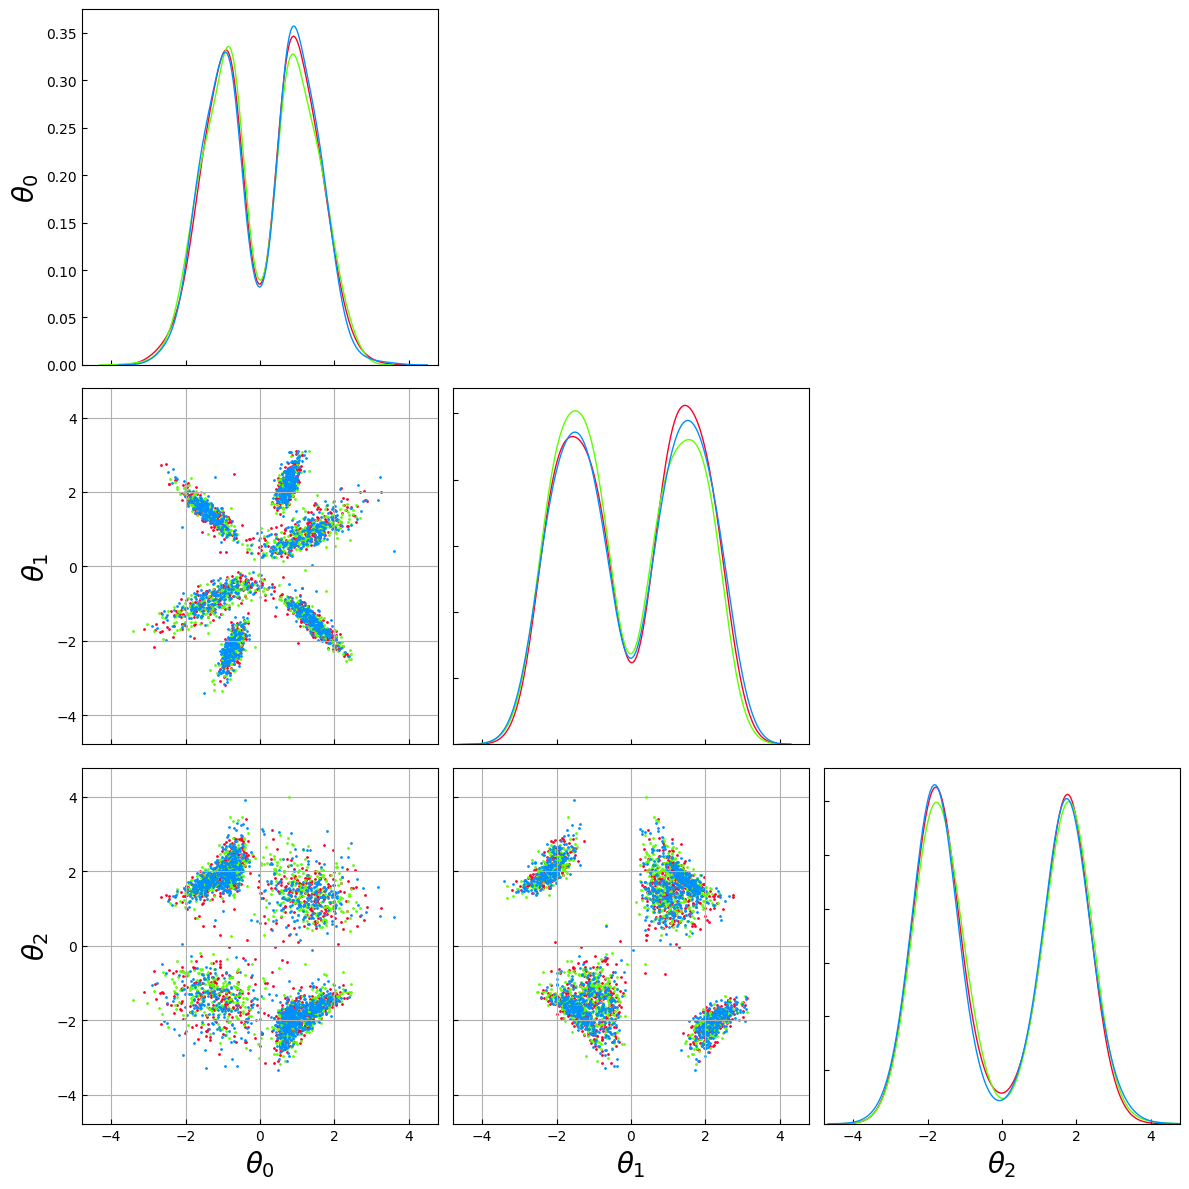

In [5]:
subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)
data_list = list(subspace_0.transpose(1, 0, 2))

figure = visualization.TriangleFigure(
    settings=visualization.settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=visualization.settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        ),
        label_size=20
    )
)
figure.plot(
    data_list=data_list
)

In [7]:
symmetry_helper.remove_symmetries(similarity_matrix="rbf", iterations=256, tanh_planes=2, k=1024, verbose=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3822/3822 [00:14<00:00, 266.62it/s]


### After Removal

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.25it/s]


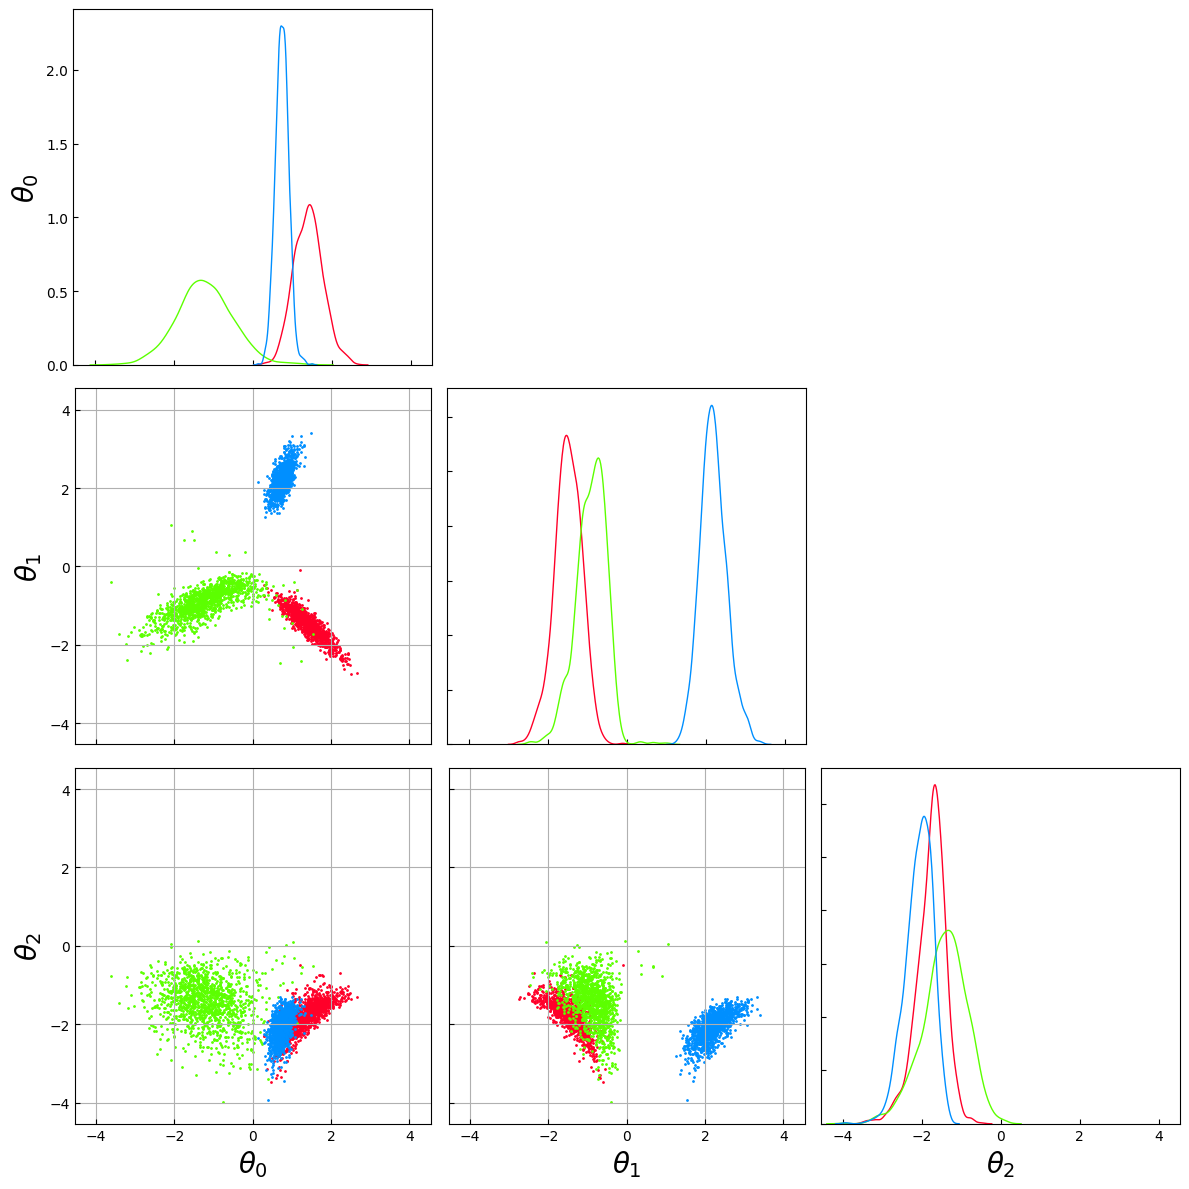

In [8]:
subspace_0 = symmetry_helper.hidden_layer_subspace(layer=0)
data_list = list(subspace_0.transpose(1, 0, 2))

figure = visualization.TriangleFigure(
    settings=visualization.settings.SettingsTriangleFigure(
        ax_width=4.0,
        ax_height=4.0,
        prefix=r"\theta",
        settings_scatter=visualization.settings.SettingsScatter(
            alpha=1.0,
            size=1.0
        ),
        label_size=20
    )
)
figure.plot(
    data_list=data_list
)